**Mobina Pournemat**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# **EDA Process:**

In [ ]:
df = pd.read_csv('dataR2.csv')
rows_count = len(df.index)
print("Number of samples: ", rows_count)

Number of samples:  116


In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Some interesting information about data:

In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


Status of null values and data type of columns:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Number of Null values per column:

In [ ]:
print(df.isnull().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


This function is used to remove a row or a column from a dataframe that has a NaN or missing values in it. As this dataset doesn't have any missing value, calling this function doesn't make change!


In [ ]:
df.dropna()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


Random shuffle:

In [ ]:
df = df.sample(frac = 1)

**Charts :**



In [ ]:
df['index'] = df.reset_index().index

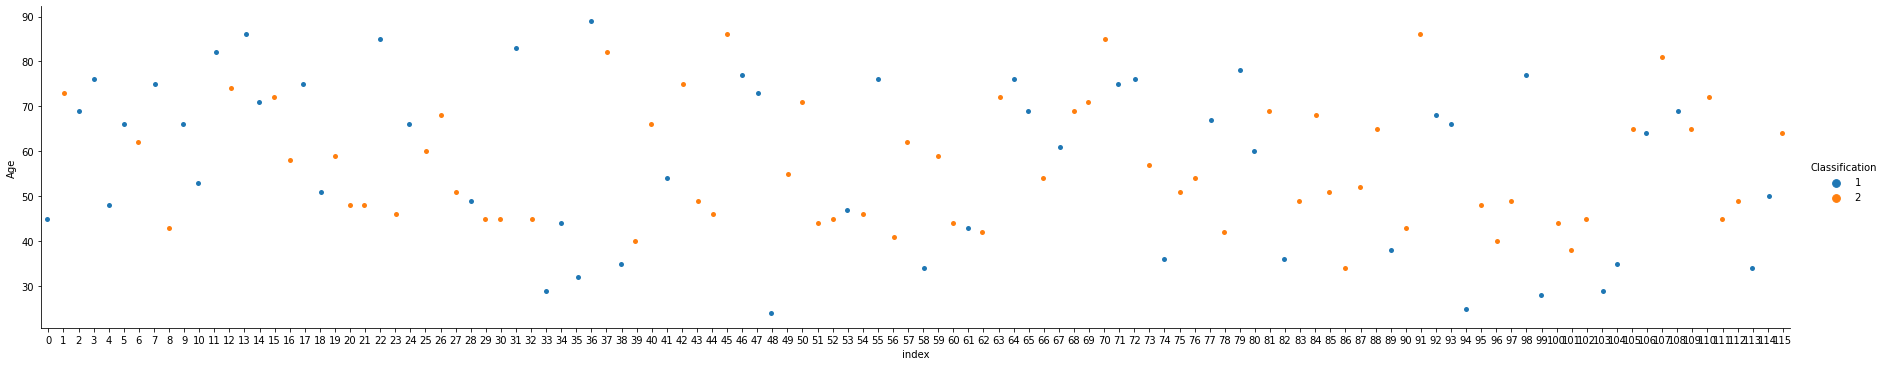

In [ ]:
sns.catplot(x="index", y="Age", hue="Classification", data=df, aspect=25/5)

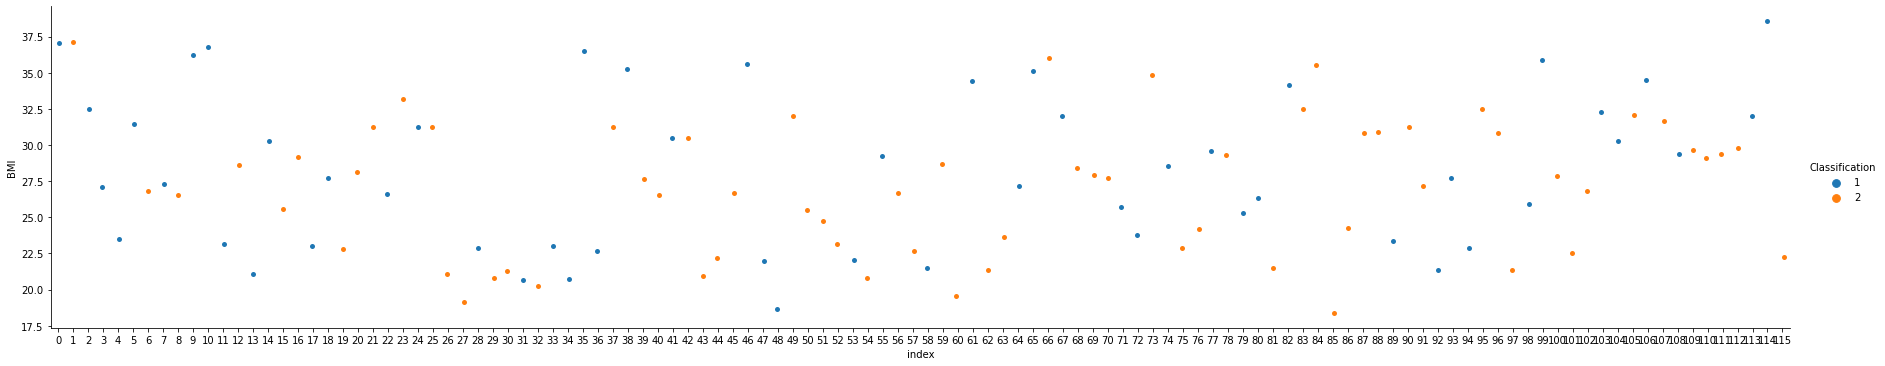

In [ ]:
sns.catplot(x="index", y="BMI", hue="Classification", data=df, aspect=25/5)

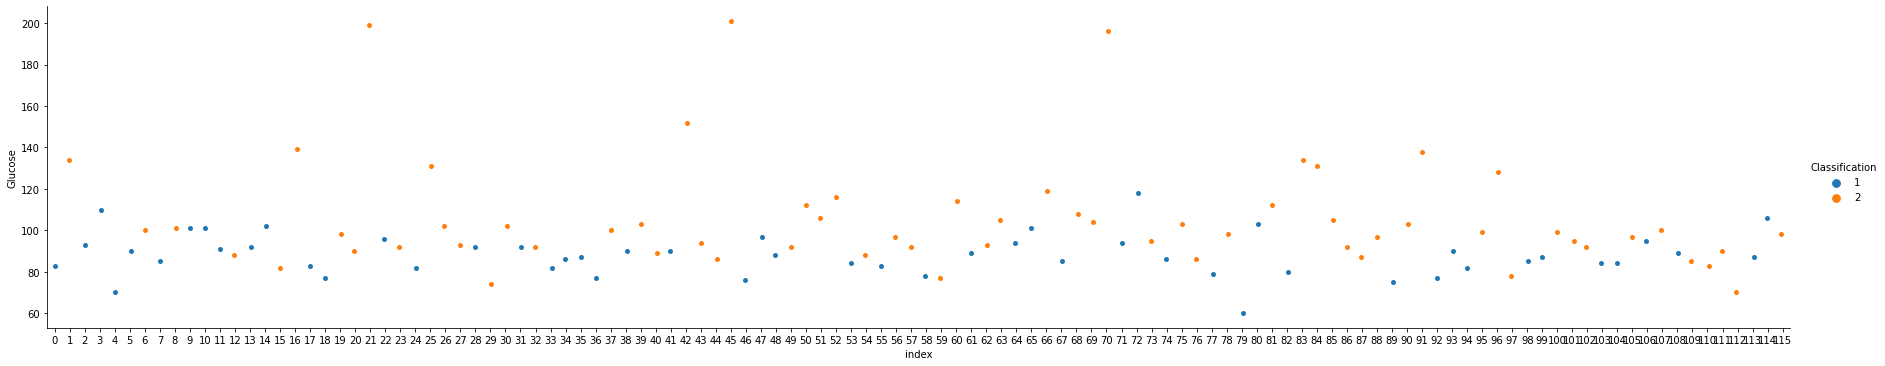

In [ ]:
sns.catplot(x="index", y="Glucose", hue="Classification", data=df, aspect=25/5)

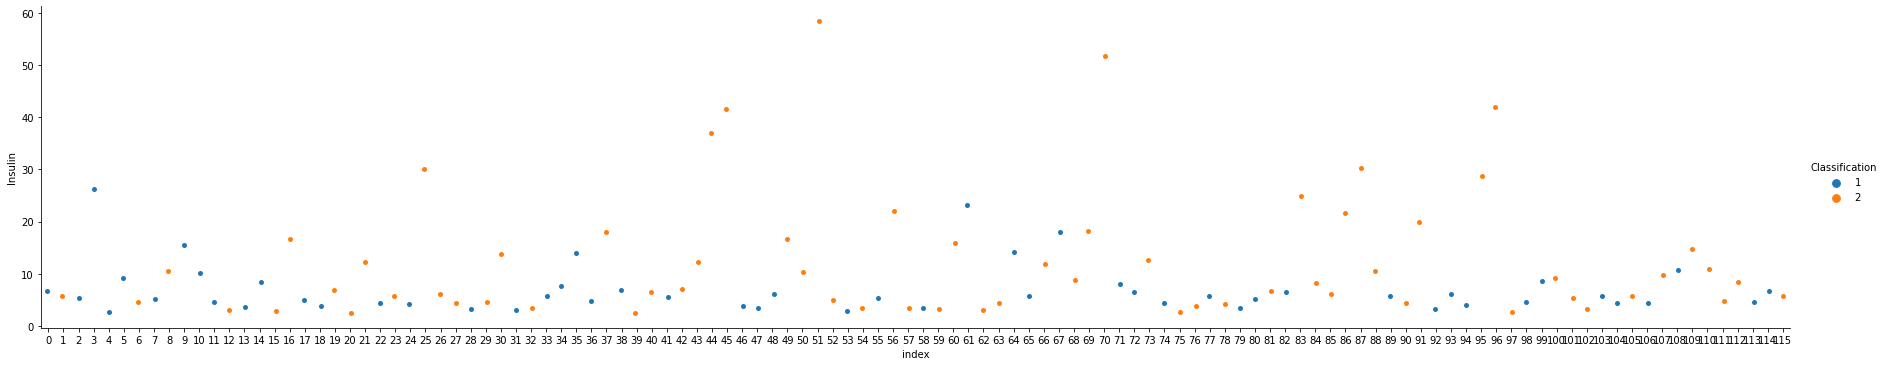

In [ ]:
sns.catplot(x="index", y="Insulin", hue="Classification", data=df, aspect=25/5)

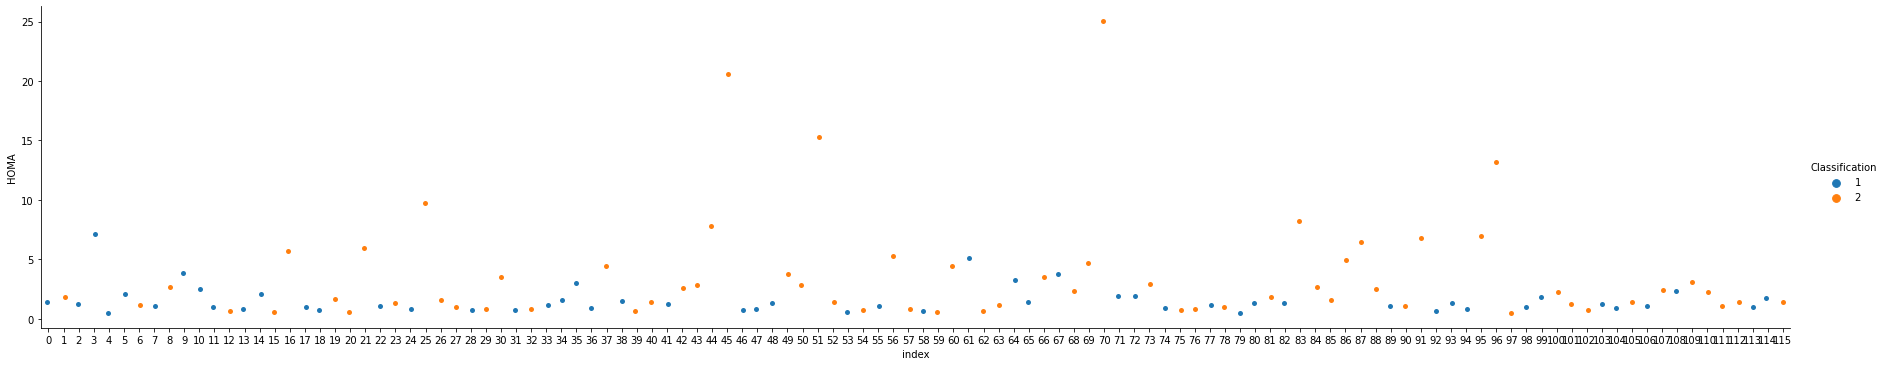

In [ ]:
sns.catplot(x="index", y="HOMA", hue="Classification", data=df, aspect=25/5)

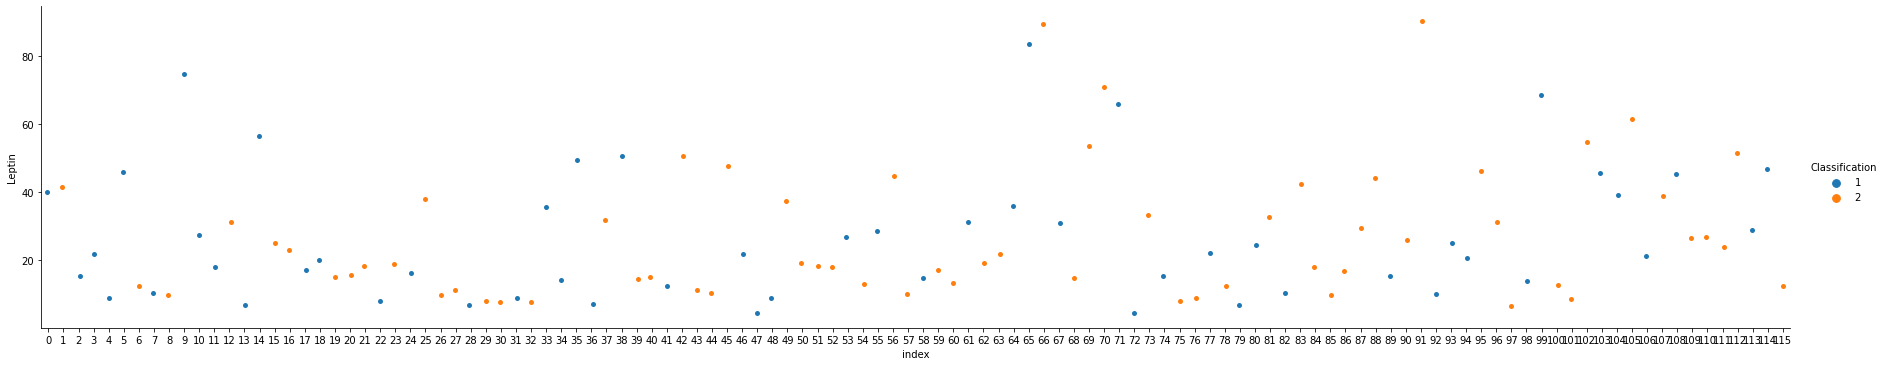

In [ ]:
sns.catplot(x="index", y="Leptin", hue="Classification", data=df, aspect=25/5)

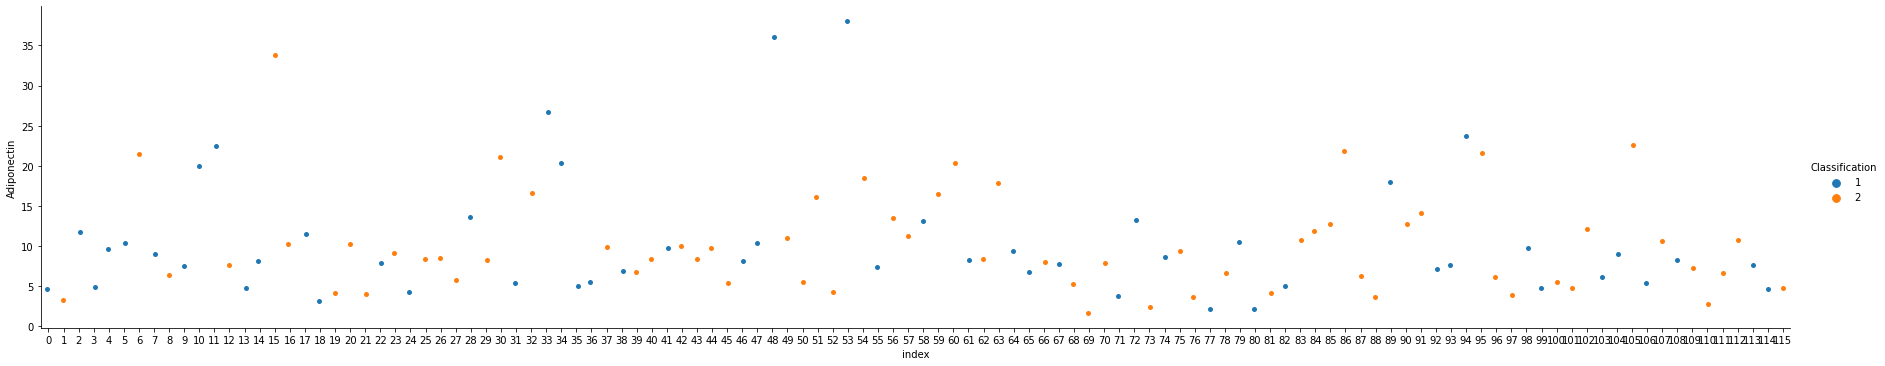

In [ ]:
sns.catplot(x="index", y="Adiponectin", hue="Classification", data=df, aspect=25/5)

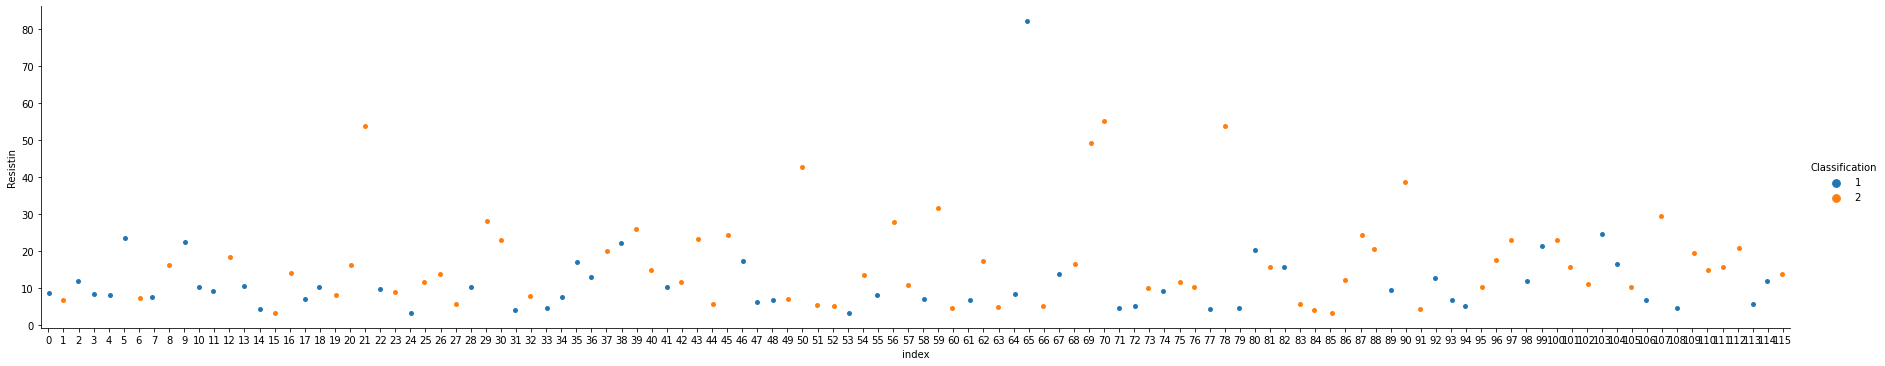

In [ ]:
sns.catplot(x="index", y="Resistin", hue="Classification", data=df, aspect=25/5)

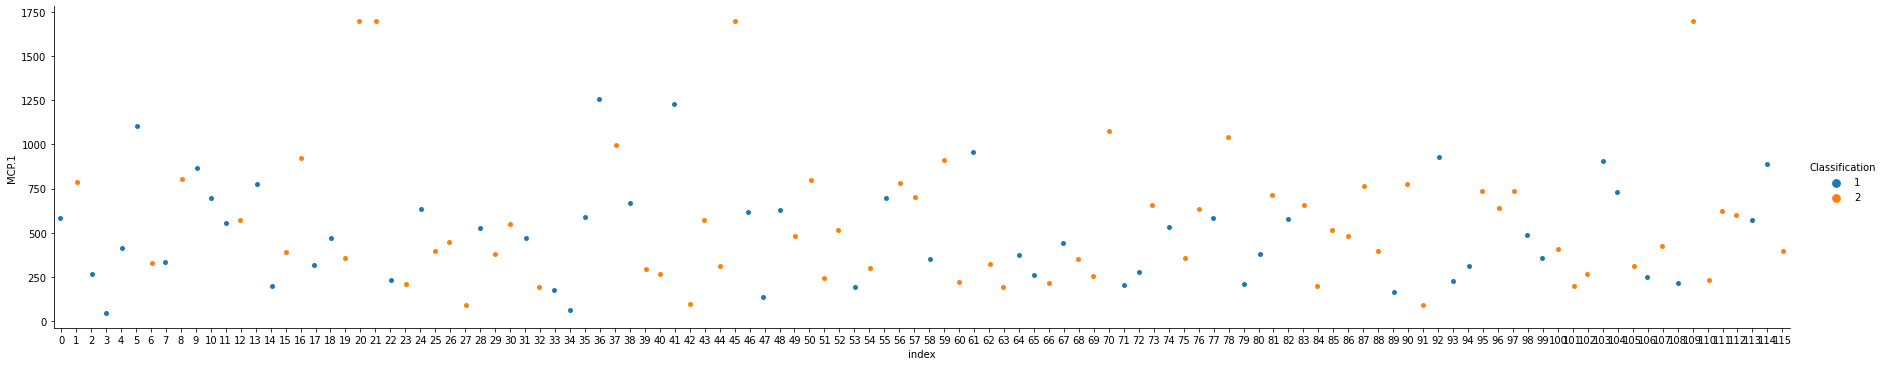

In [ ]:
sns.catplot(x="index", y="MCP.1", hue="Classification", data=df, aspect=25/5)

As shown, there is no single feature that can classify data!

So maybe we could find a couple of features that be able to separate different classes of data.

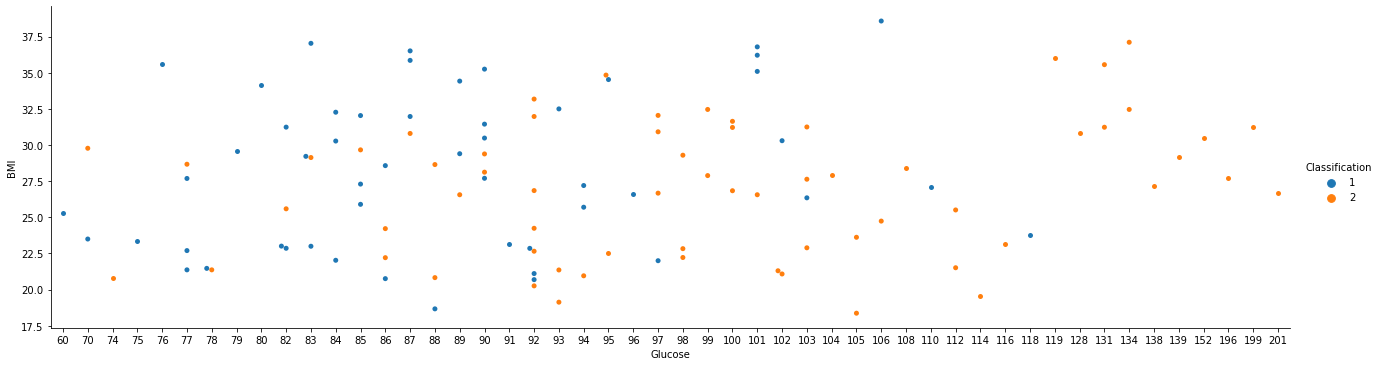

In [ ]:
sns.catplot(x="Glucose", y="BMI", hue="Classification", kind="swarm", data=df, aspect=18/5)

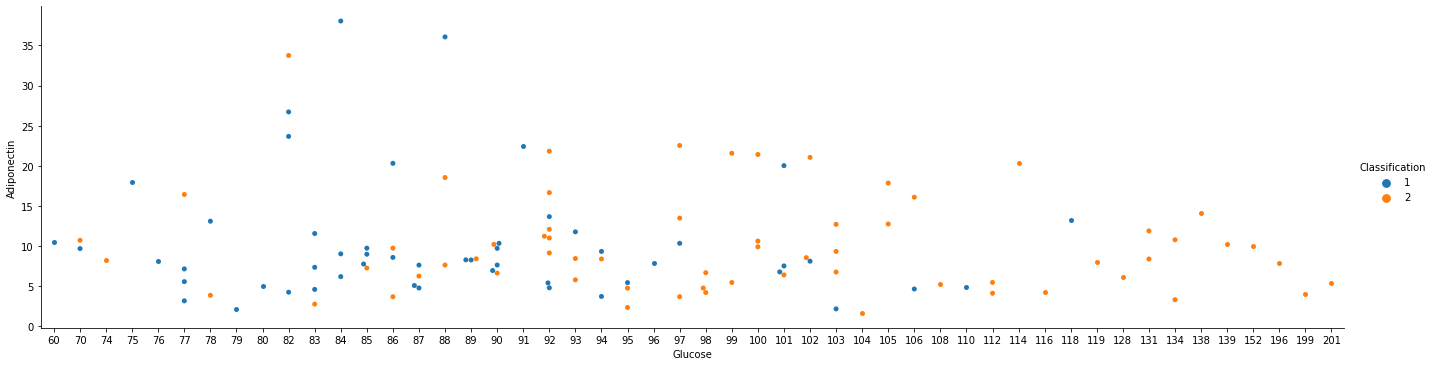

In [ ]:
sns.catplot(x="Glucose", y="Adiponectin", hue="Classification", kind="swarm", data=df, aspect=15/4)

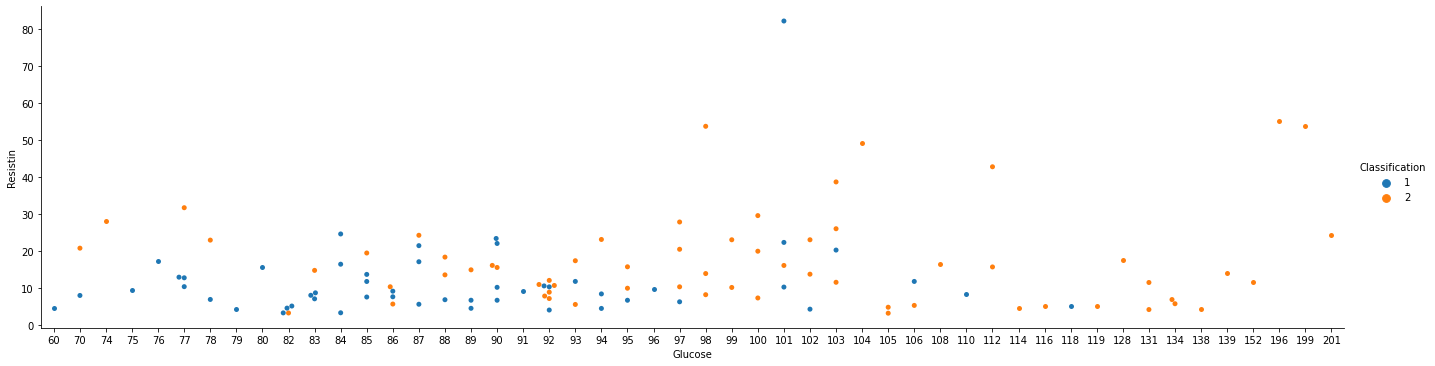

In [ ]:
sns.catplot(y="Resistin", x="Glucose", hue="Classification", kind="swarm", data=df, aspect=15/4)

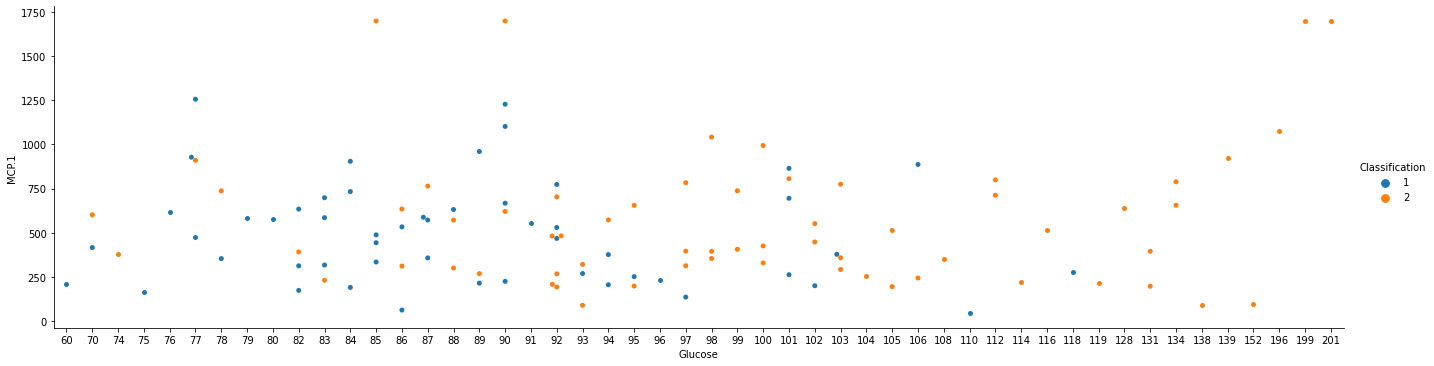

In [ ]:
sns.catplot(y="MCP.1", x="Glucose", hue="Classification", kind="swarm", data=df, aspect=15/4)

In the above charts, we have some pairs of features that have been able to separate almost different classes of data. but still, we can't separate our data using a line.



Now we don't need "index" column, so we can drop it from the dataframe.

In [ ]:
df.drop('index', inplace=True, axis=1)

**Models**
---

1.   **Logistic Regression**
2.   **SVM (linear Kernel)**
3.   **SVM (rbf Kernel)**
4.   **Decision Tree**
5.   **KNN**





---



**K-fold Cross validation: (with normalization)**

In [ ]:
from random import randrange
def cross_validation_split(dataset, folds):
        y = dataset['Classification']
        X = dataset[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']]
        X =(X-X.mean())/X.std()  # Normalization 
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        for i in range(folds):
            fold = []
            while len(fold) < fold_size:
                r = randrange(df_copy.shape[0])
                index = df_copy.index[r]
                temp = []
                temp.append(X.loc[index].values.tolist())
                temp.append(y.loc[index])
                fold.append(temp)
                df_copy = df_copy.drop(index) 
            dataset_split.append(np.asarray(fold))
            
        return dataset_split

In [ ]:
split = cross_validation_split(df, 5)

In [ ]:
def get_accuracy(lst1, lst2):
  cnt = 0
  for i in range(len(lst1)):
    if lst1[i] == lst2[i]:
      cnt += 1
  return (100*cnt)/len(lst1)

**1. Logistic Regression**

In [ ]:
sum_perc_train, sum_perc_val = 0, 0
for i in range(5):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for j in range(5):
    for rec in split[j]:
      if j != i: # train
        X_train.append(rec[0])
        y_train.append(rec[1])
      else: # validation
        X_val.append(rec[0])
        y_val.append(rec[1])
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)
  pred_train = clf.predict(X_train)
  sum_perc_train += get_accuracy(pred_train, y_train)
  pred_val = clf.predict(X_val)
  sum_perc_val += get_accuracy(pred_val, y_val)

print("Accuracy in train data: ", sum_perc_train/5)
print("Accuracy in validation data: ", sum_perc_val/5)

Accuracy in train data:  78.69565217391305
Accuracy in validation data:  76.52173913043478


**2. SVM (linear Kernel)**

In [ ]:
sum_perc_train, sum_perc_val = 0, 0
for i in range(5):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for j in range(5):
    for rec in split[j]:
      if j != i: # train
        X_train.append(rec[0])
        y_train.append(rec[1])
      else: # validation
        X_val.append(rec[0])
        y_val.append(rec[1])
  clf = svm.SVC(kernel='linear')
  clf.fit(X_train, y_train)
  pred_train = clf.predict(X_train)
  sum_perc_train += get_accuracy(pred_train, y_train)
  pred_val = clf.predict(X_val)
  sum_perc_val += get_accuracy(pred_val, y_val)

print("Accuracy in train data: ", sum_perc_train/5)
print("Accuracy in validation data: ", sum_perc_val/5)

Accuracy in train data:  78.4782608695652
Accuracy in validation data:  74.78260869565216


**3. SVM (rbf Kernel)**

In [ ]:
sum_perc_train, sum_perc_val = 0, 0
for i in range(5):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for j in range(5):
    for rec in split[j]:
      if j != i: # train
        X_train.append(rec[0])
        y_train.append(rec[1])
      else: # validation
        X_val.append(rec[0])
        y_val.append(rec[1])
  clf = svm.SVC(kernel='rbf')
  clf.fit(X_train, y_train)
  pred_train = clf.predict(X_train)
  sum_perc_train += get_accuracy(pred_train, y_train)
  pred_val = clf.predict(X_val)
  sum_perc_val += get_accuracy(pred_val, y_val)

print("Accuracy in train data: ", sum_perc_train/5)
print("Accuracy in validation data: ", sum_perc_val/5)

Accuracy in train data:  89.1304347826087
Accuracy in validation data:  80.0


**4. Decision Tree**

To avoid overfitting, I set the max_depth to search.

In [ ]:
sum_perc_train, sum_perc_val = 0, 0
for i in range(5):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for j in range(5):
    for rec in split[j]:
      if j != i: # train
        X_train.append(rec[0])
        y_train.append(rec[1])
      else: # validation
        X_val.append(rec[0])
        y_val.append(rec[1])
  clf = DecisionTreeClassifier(random_state=0, max_depth=4)
  clf.fit(X_train, y_train)
  pred_train = clf.predict(X_train)
  sum_perc_train += get_accuracy(pred_train, y_train)
  pred_val = clf.predict(X_val)
  sum_perc_val += get_accuracy(pred_val, y_val)

print("Accuracy in train data: ", sum_perc_train/5)
print("Accuracy in validation data: ", sum_perc_val/5)

Accuracy in train data:  93.2608695652174
Accuracy in validation data:  71.30434782608697


**5. KNN**

In [ ]:
sum_perc_train, sum_perc_val = 0, 0
for i in range(5):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for j in range(5):
    for rec in split[j]:
      if j != i: # train
        X_train.append(rec[0])
        y_train.append(rec[1])
      else: # validation
        X_val.append(rec[0])
        y_val.append(rec[1])
  neigh = KNeighborsClassifier(n_neighbors=7)
  neigh.fit(X_train, y_train)
  pred_train = neigh.predict(X_train)
  sum_perc_train += get_accuracy(pred_train, y_train)
  pred_val = neigh.predict(X_val)
  sum_perc_val += get_accuracy(pred_val, y_val)

print("Accuracy in train data: ", sum_perc_train/5)
print("Accuracy in validation data: ", sum_perc_val/5)

Accuracy in train data:  82.3913043478261
Accuracy in validation data:  78.2608695652174


As shown, the KNN algorithm and the SVM with the "rbf" kernel have better results than others. Also, the decision tree got overfit to the data, so this approach can't make good predictions.